<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = "DATA/Sacramento_transactions.csv"

In [3]:
data = pd.read_csv(house_csv)
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
data.shape    

(985, 12)

In [5]:
#check null
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [7]:
data.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [8]:
# size of house = 0 sq_ft
data[(data['sq__ft'] == 0)]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539
966,9197 CORTINA CIR,ROSEVILLE,95678,CA,3,2,0,Condo,Thu May 15 00:00:00 EDT 2008,220000,38.793152,-121.290025
970,3557 SODA WAY,SACRAMENTO,95834,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,224000,38.631026,-121.501879


In [9]:
data['sq__ft'] = np.where(data['sq__ft'] == 0, np.nan, data['sq__ft'])

In [10]:
print(data[(data['sq__ft'] == 0)]['sq__ft'].count())
print(data['sq__ft'].isnull().sum())

0
171


In [11]:
#drop null or where sq_ft is = 0
data.dropna(inplace = True)
print(data['sq__ft'].isnull().sum())

0


In [12]:
data.groupby(by=['type'])['type'].count()

type
Condo            42
Multi-Family     13
Residential     759
Name: type, dtype: int64

In [13]:
# all properties are in CA
data.groupby(by=['state'])['state'].count()

state
CA    814
Name: state, dtype: int64

In [14]:
data.groupby(by=['city'])['city'].count()

city
ANTELOPE            33
AUBURN               3
CAMERON PARK         1
CARMICHAEL          20
CITRUS HEIGHTS      35
COOL                 1
DIAMOND SPRINGS      1
EL DORADO            2
EL DORADO HILLS      3
ELK GROVE          107
ELVERTA              4
FAIR OAKS            9
FOLSOM              15
GALT                20
GOLD RIVER           3
GRANITE BAY          3
GREENWOOD            1
LINCOLN              6
LOOMIS               2
MATHER               1
MEADOW VISTA         1
NORTH HIGHLANDS     21
ORANGEVALE          11
PENRYN               1
PLACERVILLE          5
POLLOCK PINES        3
RANCHO CORDOVA      21
RANCHO MURIETA       2
RIO LINDA           12
ROCKLIN              8
ROSEVILLE           28
SACRAMENTO         424
SLOUGHHOUSE          1
WALNUT GROVE         1
WEST SACRAMENTO      1
WILTON               4
Name: city, dtype: int64

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

Text(0, 0.5, 'variables')

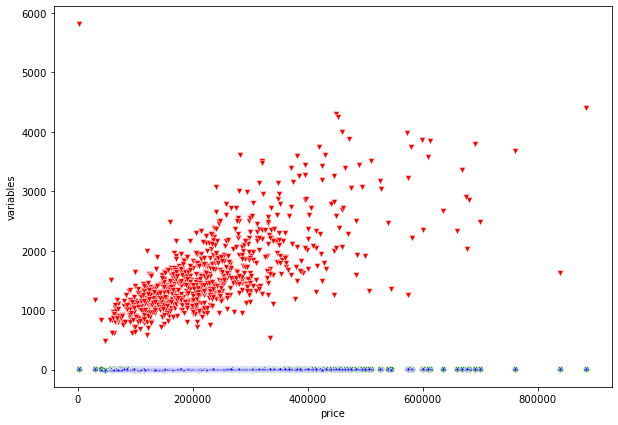

In [15]:
# Let's see how target are related with other variables using scatter plot.

plt.figure(figsize = (10,7))
#scatter price VS size 
sns.scatterplot(data['price'], data['sq__ft'], color = 'red', marker='v')

#scatter price VS beds 
sns.scatterplot(data['price'], data['beds'], color = 'green', marker='o')

#scatter price VS baths 
sns.scatterplot(data['price'], data['baths'], color = 'blue', marker='*')

plt.xlabel('price')
plt.ylabel('variables')

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sq__ft'>

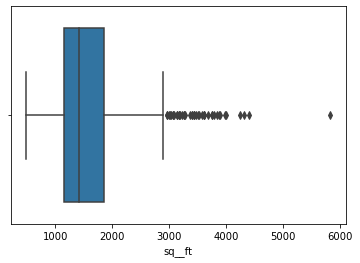

In [16]:
# check outlier in sq_ft 

sns.boxplot(data['sq__ft'])

In [17]:
# check upper and lower limit
lower_limit = data['sq__ft'].quantile(0.01)
upper_limit = data['sq__ft'].quantile(0.99)
print(lower_limit)
print(upper_limit)

699.38
3831.5


In [18]:
outliers = data[(data['sq__ft'] > upper_limit) | (data['sq__ft'] < lower_limit)]
outliers['sq__ft'].count()

18

In [19]:
# remove 18 outliers 
data['sq__ft'] = np.where(data['sq__ft'] > upper_limit, np.nan, data['sq__ft'])
data['sq__ft'] = np.where(data['sq__ft'] < lower_limit, np.nan, data['sq__ft'])
data['sq__ft'].isnull().sum()

18

In [20]:
# drop all outliers
data.dropna(inplace = True)
data['sq__ft'].isnull().sum()

0

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sq__ft'>

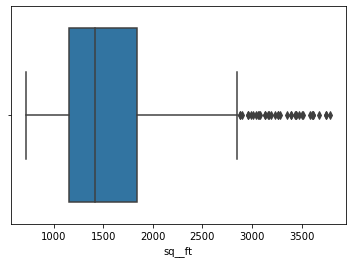

In [21]:
# check outlier in sq_ft 

sns.boxplot(data['sq__ft'])

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


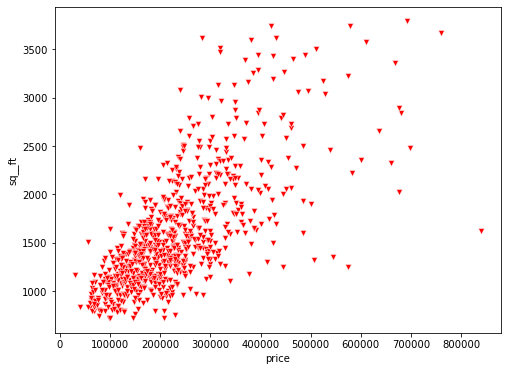

In [22]:
plt.figure(figsize = (8,6))
#scatter price VS size 
sns.scatterplot(data['price'], data['sq__ft'], color = 'red', marker='v')
plt.show()

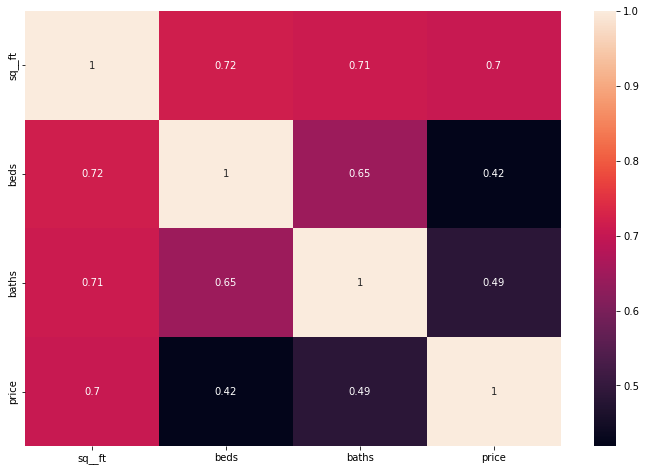

In [23]:
# plot heat map
data_corr = data[['sq__ft', 'beds', 'baths', 'price']].corr()[['sq__ft', 'beds', 'baths', 'price']]

# Create heatmap
plt.figure(figsize = (12,8))

sns.heatmap(data_corr, annot=True)

# Show figure
plt.show()

In [24]:
print(data.corr().abs().nlargest(4, 'price').index)

Index(['price', 'sq__ft', 'baths', 'beds'], dtype='object')


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [25]:
# ANSWER
# Price 

#### 2.2 List all possible variables which might be Predictor variable.

In [26]:
# ANSWER - 3 variables
# baths 
# beds
# sq_ft

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

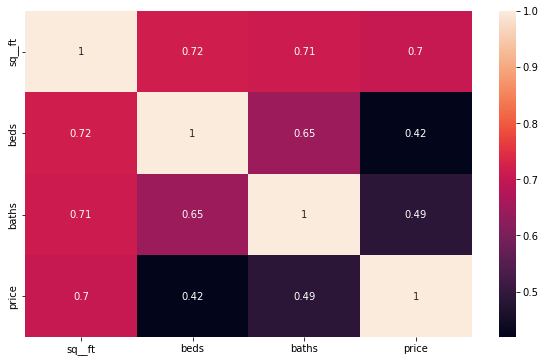

In [27]:
# ANSWER
# plot heat map
data_corr = data[['sq__ft', 'beds', 'baths', 'price']].corr()[['sq__ft', 'beds', 'baths', 'price']]

# Create heatmap
plt.figure(figsize = (10,6))

sns.heatmap(data_corr, annot=True)

# Show figure
plt.show()

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [28]:
# ANSWER

# use sq_ft to predited 
X = data[['sq__ft']]
y = data[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# model: get a model with training-data set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [29]:
X.count()

sq__ft    796
dtype: int64

In [30]:
y.count()

price    796
dtype: int64

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [31]:
# ANSWER
from sklearn.metrics import mean_absolute_error

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# The mean absolute error
print("MAE = %5.3f" % mean_absolute_error(y_test, y_pred))

MAE = 55736.348


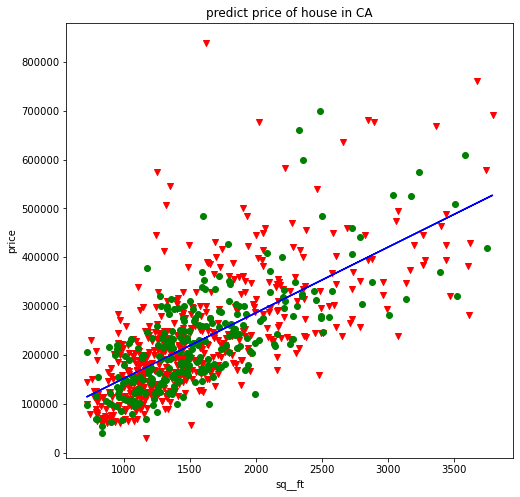

In [32]:
#plot 
plt.figure(figsize=(8, 8))

# Train
plt.scatter(X_train, y_train, color = 'red', marker='v')

# Test (predicted) 
plt.scatter(X_test, y_test, color = 'green')

# plot the model 
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('predict price of house in CA')
plt.xlabel('sq__ft')
plt.ylabel('price')
plt.show()

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [33]:
# ANSWER
X = data[['sq__ft']]
y = data[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# model: get a model with training-data set
regressor = LinearRegression()
regressor.fit(X_train, y_train)




LinearRegression()

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [34]:
# The coefficients or beta_1 using the method 
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [[134.55638732]]


In [35]:
# sample mean 
y_mean = y_train.mean(axis = 0)[0]
X_mean = X_train.mean(axis = 0)[0]

In [36]:
# manual calculate bata_1 
xy_ = 0 
X_2 = 0

for k in range(len(X_train)):
    xy_ = xy_ + (X_train.iloc[k][0] - X_mean) * (y_train.iloc[k][0] - y_mean)
    X_2 = X_2 + (X_train.iloc[k][0] - X_mean)**2

beta_1 = xy_ / X_2
print(beta_1)
    

134.55638731764842


##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [37]:
# ANSWER

#Intercept or beta_0
print('Intercept: \n', regressor.intercept_ )

Intercept: 
 [17342.2196842]


In [38]:
# intercept 
beta_0 = y_mean - beta_1*X_mean
beta_0

17342.219684202806

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [39]:
# ANSWER
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred[0:5, :]

array([[160510.21579018],
       [151091.26867795],
       [229941.31164609],
       [224962.72531533],
       [229672.19887145]])

In [40]:
# Predicting the Test set results
y_pred_list = []
for k in range(len(X_test)) :
    result = beta_0 + beta_1*X_test.iloc[k][0]
    y_pred_list.append(result)

    
y_pred_list[0:5]

[160510.21579018072,
 151091.26867794534,
 229941.3116460873,
 224962.7253153343,
 229672.198871452]

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [41]:
# ANSWER
residual = []
y_pred_list = pd.DataFrame(y_pred_list)

for k in range(len(y_test)) : 
    result = y_test.iloc[k][0] - y_pred_list.iloc[k][0]
    residual.append(result)

residual[0:5]

[-51510.21579018072,
 -8591.268677945336,
 -61941.3116460873,
 50037.274684665696,
 -34672.19887145201]

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [42]:
# ANSWER
from sklearn.metrics import mean_squared_error, r2_score

# Explained variance score: 1 is perfect prediction
print("R^2 = %0.5f" % r2_score(y_test, y_pred))

R^2 = 0.52637


In [55]:
SS_res = 0
SS_tot = 0
mean_y = y_test.mean()[0]

for k in range(len(y_test)) : 
    result_res = (y_test.iloc[k][0] - y_pred_list.iloc[k][0])**2
    SS_res = SS_res + result_res
    result_tot = (y_test.iloc[k][0] - mean_y)**2
    SS_tot = SS_tot + result_tot

r_2 = 1-(SS_res /SS_tot )
print("R^2 = %0.5f" % r_2)

R^2 = 0.52637


##### 2.7.F [BONUS] Draw Plot of Predicted Line

<Figure size 576x576 with 0 Axes>

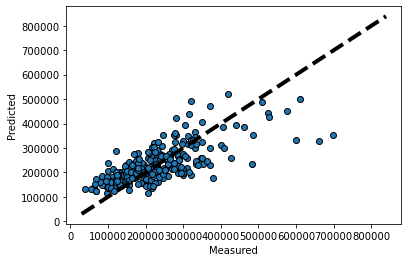

In [44]:
# ANSWER

#plot 
plt.figure(figsize=(8, 8))
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors = (0, 0, 0))

ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw = 4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

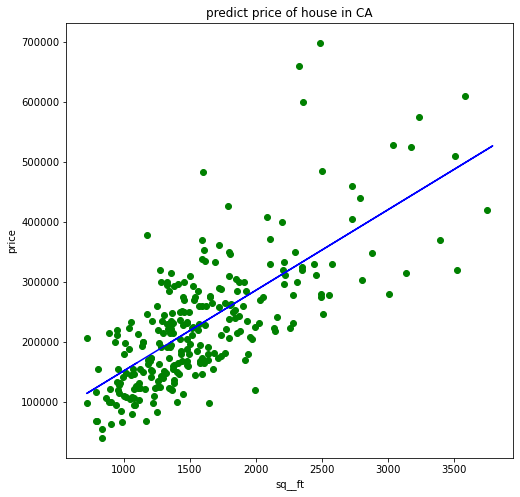

In [45]:
# ANSWER
#plot 
plt.figure(figsize=(8, 8))

# Test (data set for predicting) 
plt.scatter(X_test, y_test, color = 'green')

# plot the model 
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

plt.title('predict price of house in CA')
plt.xlabel('sq__ft')
plt.ylabel('price')
plt.show()

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [46]:
# 'Actual price of the data '
data['price'][(data['street'] == '1140 EDMONTON DR')] 

930    174250
Name: price, dtype: int64

In [47]:
# ANSWER
regressor.predict([[1204]])

array([[179348.11001465]])

In [48]:
# improve the prediction with MLR

In [49]:
# MLR

In [50]:
# ANSWER
X = data[['sq__ft', 'beds', 'baths']]
y = data[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# model: get a model with training-data set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# The coefficients or beta_1
print('Coefficients: \n', regressor.coef_)

#Intercept or beta_0
print('Intercept: \n', regressor.intercept_ )


Coefficients: 
 [[   158.52627818 -26784.63044155   4187.600982  ]]
Intercept: 
 [58198.98054243]


In [51]:
# the score
print("R^2 = %0.5f" % r2_score(y_test, y_pred))
# The mean absolute error
print("MAE = %5.3f" % mean_absolute_error(y_test, y_pred))

R^2 = 0.54060
MAE = 54365.137


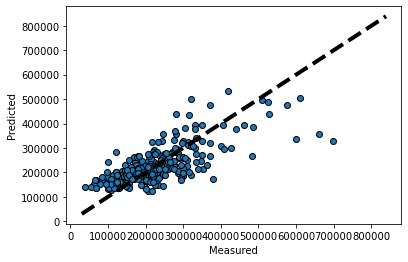

In [52]:
# Plot outputs
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors = (0, 0, 0))

ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw = 4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [53]:
# the actual price is 174250
regressor.predict([[1204,3,2]]) 

array([[177085.93010684]])

In [54]:
# summary : the result from multiple linear regression 
# gives better result of prediction than simple linear regression for the dataset



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



